In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [63]:
tDaily_gen = pd.read_csv("tDaily_gen.csv",parse_dates=['Datetime'],index_col=['Datetime'])
tDaily_ny_gen = pd.read_csv("tDaily_ny_gen.csv",parse_dates=['Datetime'],index_col=['Datetime'])
tDaily_ny_covid = pd.read_csv("tDaily_ny_covid.csv",parse_dates=['Datetime'],index_col=['Datetime'])

In [54]:
corr = tDaily_gen.corr()
print(corr)
# clustergrid = sns.clustermap(corr,annot=True)

                         senti  weightedSenti  rolling_sum  \
senti                 1.000000       0.100948     0.997388   
weightedSenti         0.100948       1.000000     0.112324   
rolling_sum           0.997388       0.112324     1.000000   
rolling_sum_weighted  0.101247       0.998716     0.113004   

                      rolling_sum_weighted  
senti                             0.101247  
weightedSenti                     0.998716  
rolling_sum                       0.113004  
rolling_sum_weighted              1.000000  


In [77]:
print(tDaily_gen)

                              senti  weightedSenti  rolling_sum  \
Datetime                                                          
2020-01-21 00:00:00+00:00  0.451613       0.662701     0.442396   
2020-01-22 00:00:00+00:00  0.451613       0.627530     0.419355   
2020-01-23 00:00:00+00:00  0.322581       0.631466     0.333333   
2020-01-24 00:00:00+00:00  0.258065       0.605365     0.279570   
2020-01-25 00:00:00+00:00  0.354839       0.560506     0.344086   
...                             ...            ...          ...   
2020-04-29 00:00:00+00:00  0.709677       0.659246     0.688172   
2020-04-30 00:00:00+00:00  0.903226       0.636050     0.924731   
2020-05-01 00:00:00+00:00  0.774194       0.635619     0.774194   
2020-05-02 00:00:00+00:00  0.612903       0.476000     0.591398   
2020-05-03 00:00:00+00:00  0.612903       0.464456     0.602151   

                           rolling_sum_weighted  
Datetime                                         
2020-01-21 00:00:00+00:00   

In [73]:
# read in the data from the structured sources.....
# start with just the nyc data per day 
def parser(date):  
    return pd.to_datetime(date,utc=True)

nyc_actual = pd.read_csv("../coronavirus-data/case-hosp-death.csv",parse_dates=['DATE_OF_INTEREST'],date_parser=parser,index_col=['DATE_OF_INTEREST'])
nyc_actual.head()


,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-02-29 00:00:00+00:00,1,14,0
2020-03-01 00:00:00+00:00,1,4,0
2020-03-02 00:00:00+00:00,0,22,0
2020-03-03 00:00:00+00:00,2,20,0
2020-03-04 00:00:00+00:00,5,22,0


In [74]:
nyc_self = nyc_actual.corr()
print(nyc_self)

                    CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT
CASE_COUNT            1.000000            0.953366     0.752953
HOSPITALIZED_COUNT    0.953366            1.000000     0.800798
DEATH_COUNT           0.752953            0.800798     1.000000


In [75]:
print(nyc_actual.dtypes)

CASE_COUNT            int64
HOSPITALIZED_COUNT    int64
DEATH_COUNT           int64
dtype: object


In [82]:
# merge the structured and unstructured data 

merged = pd.merge(left=nyc_actual, right=tDaily_gen, left_index=True,right_index=True)
print(merged)

                           CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT  \
2020-02-29 00:00:00+00:00           1                  14            0   
2020-03-01 00:00:00+00:00           1                   4            0   
2020-03-02 00:00:00+00:00           0                  22            0   
2020-03-03 00:00:00+00:00           2                  20            0   
2020-03-04 00:00:00+00:00           5                  22            0   
...                               ...                 ...          ...   
2020-04-29 00:00:00+00:00        2334                 419          200   
2020-04-30 00:00:00+00:00        2003                 329          184   
2020-05-01 00:00:00+00:00        1863                 365          171   
2020-05-02 00:00:00+00:00        1047                 267          160   
2020-05-03 00:00:00+00:00         776                 238          146   

                              senti  weightedSenti  rolling_sum  \
2020-02-29 00:00:00+00:00  0.290323       0.

                      CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT     senti  \
CASE_COUNT              1.000000            0.948661     0.730299  0.335808   
HOSPITALIZED_COUNT      0.948661            1.000000     0.782964  0.264011   
DEATH_COUNT             0.730299            0.782964     1.000000  0.250089   
senti                   0.335808            0.264011     0.250089  1.000000   
weightedSenti           0.247279            0.207066     0.156832  0.199905   
rolling_sum             0.344551            0.267289     0.252578  0.996191   
rolling_sum_weighted    0.251371            0.210283     0.160111  0.206899   

                      weightedSenti  rolling_sum  rolling_sum_weighted  
CASE_COUNT                 0.247279     0.344551              0.251371  
HOSPITALIZED_COUNT         0.207066     0.267289              0.210283  
DEATH_COUNT                0.156832     0.252578              0.160111  
senti                      0.199905     0.996191              0.206899  
we

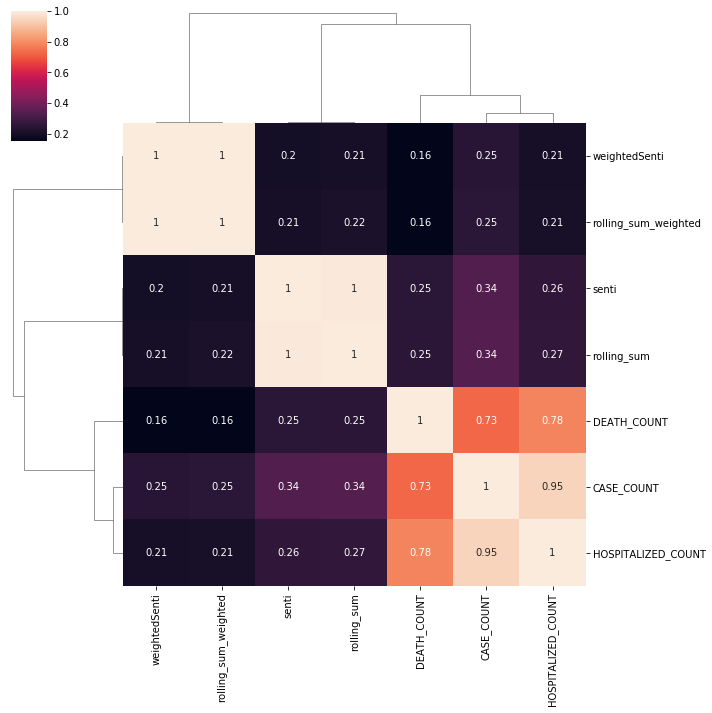

In [85]:
corrMerge = merged.corr()
print(corrMerge)
clustergrid = sns.clustermap(corrMerge,annot=True)